## Homework 4

## <em> Linear Algebra and Data Modeling</em>
<br>
This notebook is arranged in cells. Texts are usually written in the markdown cells, and here you can use html tags (make it bold, italic, colored, etc). You can double click on this cell to see the formatting.<br>
<br>
The ellipsis (...) are provided where you are expected to write your solution but feel free to change the template (not over much) in case this style is not to your taste. <br>
<br>
<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit. </em><br>

***
### Link Okpy

In [ ]:
from client.api.notebook import Notebook
ok = Notebook('hw4.ok')
_ = ok.auth(inline = True)

### Imports

In [3]:
import numpy as np
from scipy.integrate import quad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

***

#### Problem 1 - Gaussian Elimination

Consider the following circuit of resistors.<br>
![alt text](Circuit.png "Title")
<br>
All the resistors have the same resistance $R$. The power rail at the top is at voltage $V_+$ = 5 V. What are the other four voltages, $V_1$ to $V_4$?
To answer this question we use Ohm’s law and the Kirchhoff current law, which says that the total net current flow out of (or into) any junction in a circuit must be zero. Thus for the junction at voltage $V_1$, for instance, we have
$$ \frac{V_1 - V_2}{R} + \frac{V_1 - V_3}{R} + \frac{V_1 - V_4}{R} + \frac{V_1 - V_+}{R} = 0 $$
<br>or equivalently <br>
\begin{align}
4V_1 - V_2 - V_3 - V_4 & = V_+ \\
-V_1 + 3V_3 & = V_+ \\
-V_1 + 3V_2 - V_4 & = 0 \\
-V_1 - V_2 + 4V_4 & = 0 \\
\end{align}

<span style="color:blue"><i> 1. Write the above system of equations into a matrix form $Ax = b$. Define the coefficient matrix $A$ and the constant matrix $b$. (Note: $x$ is a variable matrix: [$V_1, V_2, V_3, V_4$]) </i></span> <br>

In [ ]:
A = ...
b = ...

<span style="color:blue"> <i> 2. Write a program to solve the four resulting equations using Gaussian elimination and hence find the four voltages. </i></span>

In [ ]:
# Gaussian Elimination

def GaussianElimination(A, b):
    
    ...
    
    return ...

x = GaussianElimination(A, b)

print('V1 =', x[0], ', V2 =', x[1], ', V3 =', x[2], ', V4 =', x[3])

<span style="color:blue"> <i> 3. Modify Part 2 to incorporate partial pivoting. (Make sure that you get the same answer.)

In [ ]:
def GaussianElimination_pivot(A, b):
    
    ...
    
    return ...

x = GaussianElimination_pivot(A, b)

print('V1 =', x[0], ', V2 =', x[1], ', V3 =', x[2], ', V4 =', x[3])

***

#### Problem 2 - Solving Least Squares Using Normal Equations and SVD

(Reference - NR 15.4) We fit a set of 50 data points $(x_i, y_i)$ to a polynomial $y(x) = a_0 + a_1x + a_2x^2 + a_3x^3$. (Note that this problem is linear in $a_i$ but nonlinear in $x_i$). The uncertainty $\sigma_i$ associated with each measurement $y_i$ is known, and we assume that the $x_i$'s are known exactly. To measure how well the model agrees with the data, we use the chi-square merit function: <br>
$$ \chi^2 = \sum_{i=0}^{N-1} \big( \frac{y_i-\sum_{k=0}^{M-1}a_k x^k}{\sigma_i} \big)^2. $$
<br>
where N = 50 and M = 4. Here, $1, x, ... , x^3$ are the basis functions.
<br><br>
<span style="color:blue"> <i> 1. Plot data (make sure to include error bars). (Hint - https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.errorbar.html) </i></span><br>

In [ ]:
# Load a given 2D data
data = np.loadtxt("HW4_Problem2_data.dat")
x = data[:,0]
y = data[:,1]
sig_y = data[:,2]

In [ ]:
# Make plot
plt.figure(figsize = (10, 7))
# Scatter plot
...

We will pick as best parameters those that minimize $\chi^2$.<br><br>
First, let $\bf A$ be a matrix whose $N \times M$ components are constructed from the $M$ basis functions evaluated at the $N$ abscissas $x_i$, and from the $N$ measurement errors $\sigma_i$, by the prescription
$$ A_{ij} = \frac{X_j(x_i)}{\sigma_i} $$
<br>where $X_0(x) = 1,\ X_1(x) = x,\ X_2(x) = x^2,\ X_3(x) = x^3$. We call this matrix $\bf A$ the design matrix.
<br><br>
Also, define a vector $\bf b$ of length $N$ by
$$ b_i = \frac{y_i}{\sigma_i} $$
<br>and denote the $M$ vector whose components are the parameters to be fitted ($a_0, a_1, a_2, a_3$) by $\bf a$.
<br><br>
<span style="color:blue"><i> 2. Define the design matrix A. (Hint: Its dimension should be NxM = 50x4.) Also, define the vector b. </i></span><br>


In [ ]:
# Define A
A = ...
# Define b
b = ...

Minimize $\chi^2$ by differentiating it with respect to all $M$ parameters $a_k$ vaishes. This condition yields the matrix equation <br>
$$ \sum_{j=0}^{M-1} \alpha_{kj}a_j = \beta_k$$ 
<br> where $\bf \boldsymbol \alpha = A^T \cdot A$ and $\bf \boldsymbol \beta = A^T \cdot b$ ($\boldsymbol \alpha$ is an $M \times M$ matrix, and $\boldsymbol \beta$ is a vector of length $M$). This is the normal equation of the least squares problem. In matrix form, the normal equations can be written as:
$$ \bf \boldsymbol \alpha \cdot a = \boldsymbol \beta. $$
<br><br>
This can be solved for the vector of parameters $\bf a$ by linear algebra numerical methods.
<br><br>
<span style="color:blue"> <i> 3. Define the matrix alpha and vector beta. </i></span><br>

In [ ]:
# Transpose of the matrix A
A_transpose = ...

# alpha matrix
alpha = ...
# beta vector
beta = ...

<span style="color:blue"> <i> 4. We have $ \bf \boldsymbol \alpha \cdot a = \boldsymbol \beta. $ Solve for $\bf a$ using (1) "GaussianElimination_pivot" from Part 1 and (2) LU decomposition and forward subsitution and backsubstitution. Plot the best-fit line on top of the data. </i></span><br>

In [ ]:
# Using the Gaussian elimination with partial pivoting
a = ...

print('Using Gaussian Elimination:')
print('a0 =', a[0], ', a1 =', a[1], ', a2 =', a[2], ', a3 =', a[3])

In [ ]:
# "lu" does LU decomposition with pivot. Reference - https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.lu_factor.html
from scipy.linalg import lu

def solve_lu_pivot(A, B):
    # LU decomposition with pivot
    L, U = lu(A, permute_l=True)
    
    N = len(B)
    
    # forward substitution: We have Ly = B. Solve for y
    ...

    # backward substitution: We have y = Ux. Solve for x.
    ...
    
    return ...

a = ...

print('Using LU Decomposition:')
print('a0 =', a[0], ', a1 =', a[1], ', a2 =', a[2], ', a3 =', a[3])

In [ ]:
# Make plot
...

The inverse matrix $\bf C = \boldsymbol \alpha^{-1}$ is called the covariance matrix, which is closely related to the probable uncertainties of the estimated parameters $\bf a$. To estimate these uncertainties, we compute the variance associated with the estimate $a_j$. Following NR p.790, we obtain: <br><br>
$$ \sigma^2(a_j) = \sum_{k=0}^{M-1} \sum_{l=0}^{M-1} C_{jk} C_{jl} \alpha_{kl} $$
<br>
<span style="color:blue"> <i> 5. Compute the error (standard deviation - square root of the variance) on the fitted parameters. </i></span><br>

In [ ]:
from scipy.linalg import inv
# Covariance matrix
C = inv(alpha)

...

sigma_a0 = ...
sigma_a1 = ...
sigma_a2 = ...
sigma_a3 = ...

print('Error: on a0 =', sigma_a0, ', on a1 =', sigma_a1, ', on a2 =', sigma_a2, ', on a3 =', sigma_a3)

Now, instead of using the normal equations, we use singular value decomposition (SVD) to find the solution of least squares. Please read Ch. 15 of NR for more details. Remember that we have the $N \times M$ design matrix $\bf A$ and the vector $\bf b$ of length $N$. We wish to mind $\bf a$ which minimizes $\chi^2 = |\bf A \cdot a - b|^2$.
<br><br>
Using SVD, we can decompose $\bf A$ as the product of an $N \times M$ column-orthogonal matrix $\bf U$, an $M \times M$ diagonal matrix $\bf S$ (with positive or zero elements - the "singular" values), and the transpose of an $M \times M$ orthogonal matrix $\bf V$. ($\bf A = USV^{T}$). <br>
Let $\bf U_{(i)}$ and $\bf V_{(i)}$ denote the columns of $\bf U$ and $\bf V$ respectively (Note: We get $M$ number of vectors of length $M$.) $\bf S_{(i,i)}$ are the $i$th diagonal elements (singular values) of $\bf S$. Then, the solution of the above least squares problem can be written as:
<br>
$$ \bf a = \sum_{i=1}^M \big( \frac{U_{(i)} \cdot b}{S_{(i,i)}} \big) V_{(i)}. $$
<br><br>
The variance in the estimate of a parameter $a_j$ is given by:
$$ \sigma^2(a_j) = \sum_{i=1}^M \big( \frac{V_{ji}}{S_{ii}} \big)^2 $$
<br>
and the covariance:
$$ \mathrm{Cov}(a_j, a_k) = \sum_{i=1}^M \big( \frac{V_{ji}V_{ki}}{S_{ii}^2} \big). $$
<br><br>
<span style="color:blue"> <i> 6. Decompose the design matrix A using SVD. Estimate the parameter $a_i$'s and its variance. </i></span><br>

In [ ]:
# Reference - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.svd.html
from scipy.linalg import svd

# Decompose A
# Note: S, in this case, is a vector of length M, which contains the singular values.
U, S, VT = svd(A, full_matrices=False)
V = V.T

# Solve for a
...
a_from_SVD = ...

print('Using SVD:')
print('a0 =', a_from_SVD[0], ', a1 =', a_from_SVD[1], ', a2 =', a_from_SVD[2], ', a3 =', a_from_SVD[3])

In [ ]:
# Error on a
...
sigma_a_SVD = ...


print('Error: on a0 =', sigma_a_SVD[0], ', on a1 =', sigma_a_SVD[1], ', on a2 =', sigma_a_SVD[2], ', on a3 =', sigma_a_SVD[3])

Suppose that you are only interested in the parameters $a_0$ and $a_1$. We can plot the 2-dimensional confidence region ellipse for these parameters by building the covariance matrix:
$$ \mathrm{C'} =  \binom{\sigma({a_0})^2\ \ \ \ \ \ \mathrm{Cov}({a_0, a_1})}{\mathrm{Cov}({a_0, a_1}) \ \ \ \ \ \ \sigma({a_1})^2} $$
<br><br>
The lengths of the ellipse axes are the square root of the eigenvalues of the covariance matrix, and we can calculate the counter-clockwise rotation of the ellipse with the rotation angle:
$$ \theta = \frac{1}{2} \mathrm{arctan}\Big( \frac{2\cdot \mathrm{Cov}({a_0, a_1})}{\sigma({a_0})^2-\sigma({a_1})^2} \Big) $$
<br>
Then, we multiply the axis lengths by some factor depending on the confidence level we are interested in. For 68%, this scale factor is $\sqrt{\Delta \chi^2} \approx 1.52$.
<br><br>
<span style="color:blue"> <i> 7. Compute the covariance between $a_0$ and $a_1$. Plot the 68% confidence region of the parameter $a_0$ and $a_1$. </i></span><br>

In [ ]:
# Compute the covariance
...
sigma_01 = ...

# Build the covariance matrix
CovM = np.array([[sigma_a_SVD[0], sigma_01],[sigma_01, sigma_a_SVD[1]]])

from numpy.linalg import eigvals
axis1 = 1.52*eigvals(CovM)[0]
axis2 = 1.52*eigvals(CovM)[1]

theta = np.arctan(2*sigma_01/(sigma_a_SVD[0]**2-sigma_a_SVD[1]**2))/2.

In [ ]:
# Plot the 1-sigma confidence region (https://stackoverflow.com/questions/32371996/python-matplotlib-how-to-plot-ellipse)
from matplotlib.patches import Ellipse
import matplotlib as mpl

ell = mpl.patches.Ellipse(xy=[a[0], a[1]], width=axis1, height=axis2, angle = theta*180/np.pi)
fig, ax = plt.subplots(figsize=(7,7))

ax.add_patch(ell)
ax.set_aspect('equal')
ax.autoscale()
plt.xlim(-0.7, 0.7)
plt.ylim(1.9, 3.3)
plt.grid(True)
plt.xlabel('$a_0$')
plt.ylabel('$a_1$')
plt.show()

***

#### Problem 3 - Rational Function

The method of finding least-squares fits using polynomials is widely used, but in some cases rational approximations behave better; they may work where the Taylor approximations do not converge.
<br><br>
Consider an exponential function $e^{-x}$. The Maclaurin series of this function is $1-x+x^2/2-x^3/6+x^4/24+O(x^5)$. However, this is a poor approximation for large $x$. To resolve this issue, we can instead write it as the rational function:
$e^{-x} = \frac{e^{-x/2}}{e^{x/2}} = \frac{1-x/2+x^2/8}{1+x/2+x^2/8}$. (For more detail, read NR 5.12 - Pade Approximant)

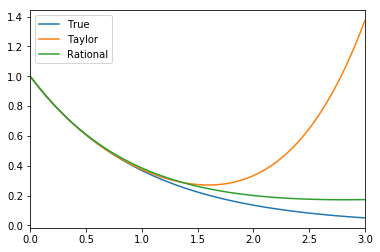

In [4]:
x = np.linspace(0, 3, 100)
plt.plot(x, np.exp(-x), label = "True")
plt.plot(x, 1-x+x**2/2-x**3/6+x**4/24, label = "Taylor")
plt.plot(x, (1-x/2+x**2/8)/(1+x/2+x**2/8), label = "Rational")
plt.xlim(0, 3)
plt.legend()
plt.show()

Now, suppose that we have measured 100 pairs of values $(x_1, y_1), ... , (x_{100}, y_{100})$ of two variables $x, y$.
<br><br>
<span style="color:blue"> <i> 1. Plot data (make sure to include error bars). (Hint - https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.errorbar.html) </i></span><br>

In [ ]:
# Load a given 2D data
data = np.loadtxt("HW4_Problem3_data.dat")
x = data[:,0]
y = data[:,1]
sig_y = data[:,2]

In [ ]:
# Make plot
...

We find that $y \sim 0$ as $x$ gets large. Hence, it is better to use rational approximations rather than polynomials in this case. We come up with the rational function model for the data:
$$ y = \frac{a_0 + a_1 x + a_2x^2 + a_3x^3}{1 + a_4 x + a_5x^2 + a_6x^3} $$
<br>where $a_i$'s are the unknown parameters.
<br><br>
Multiply both sides by the denominator of the rational function:
$$ y = a_0 + a_1 x + a_2x^2 + a_3x^3 - a_4 xy + a_5x^2y + a_6x^3y $$
<br> Again, to measure how well the model agrees with the data, we use the chi-square merit function:  $$ \chi^2 = \sum_{i=0}^{N-1} \big( \frac{y_i-(a_0 + a_1 x_i + a_2x_i^2 + a_3x_i^3 - a_4 x_iy + a_5x_i^2y_i + a_6x_i^3y_i)}{\sigma_i} \big)^2. $$
<br><br>
Wish pick the parameters which minimize $\chi^2$.<br><br>
Let us solve this problem using normal equations.<br><br>
First, let $\bf A$ be the $N \times M$ ($N$ = 100, $M$ = 7) design matrix:

\begin{bmatrix}
    1/\sigma_{y0} & x_0/\sigma_{y0} & x_0^2/\sigma_{y0} & x_0^3/\sigma_{y0} & -y_0x_0/\sigma_{y0} & -y_0x_0^2/\sigma_{y0} & -y_0x_0^3/\sigma_{y0} \\
    1/\sigma_{y1} & x_1/\sigma_{y1} & x_1^2/\sigma_{y1} & x_1^3/\sigma_{y1} & -y_1x_1/\sigma_{y1} & -y_1x_1^2/\sigma_{y1} & -y_1x_1^3/\sigma_{y1} \\
    ....&....&....&....&....&....&....     \\
    1/\sigma_{yN} & x_N/\sigma_{yN} & x_N^2/\sigma_{yN} & x_N^3/\sigma_{yN} & -y_Nx_N/\sigma_{yN} & -y_Nx_N^2/\sigma_{yN} & -y_Nx_N^3/\sigma_{yN}
\end{bmatrix}
<br><br>
Also, define a vector $\bf b$ of length $N$ by
$$ b_i = \frac{y_i}{\sigma_i} $$
<br>and denote the $M$ vector whose components are the parameters to be fitted ($a_0, a_1, a_2, a_3, a_4, a_5, a_6$) by $\bf a$.
<br><br>
Minimize $\chi^2$ by differentiating it with respect to all $M$ parameters $a_k$ vaishes. This condition yields the matrix equation <br>
$$ \bf \boldsymbol \alpha \cdot a = \boldsymbol \beta. $$
<br> where $\bf \boldsymbol \alpha = A^T \cdot A$ and $\bf \boldsymbol \beta = A^T \cdot b$ ($\boldsymbol \alpha$ is an $M \times M$ matrix, and $\boldsymbol \beta$ is a vector of length $M$). 
<br><br>
<span style="color:blue"><i> 2. We have $ \bf \boldsymbol \alpha \cdot a = \boldsymbol \beta. $ Solve for $\bf a$ using "GaussianElimination_pivot" from Part 1. </i></span><br>

In [ ]:
# Define A
A = ...
# Define b
b = ...


In [ ]:
# Transpose of the matrix A
A_transpose = ...

# alpha matrix
alpha = ...
# beta vector
beta = ...

In [ ]:
# Using the Gaussian elimination with partial pivoting
a = ...

print('Using Gaussian Elimination:')
print('a0 =', a[0], ', a1 =', a[1], ', a2 =', a[2], ', a3 =', a[3], ', a4 =', a[4], ', a5 =', a[5], ', a6 =', a[6])

<span style="color:blue"><i> 3. Compute the error (standard deviation - square root of the variance) on the fitted parameters.. </i></span><br>

In [ ]:
from scipy.linalg import inv
# Covariance matrix
C = inv(alpha)

...

sigma_a0 = ...
sigma_a1 = ...
sigma_a2 = ...
sigma_a3 = ...
sigma_a4 = ...
sigma_a5 = ...
sigma_a6 = ...

print('Error: on a0 =', sigma_a0, ', on a1 =', sigma_a1, ', on a2 =', sigma_a2, ', on a3 =', sigma_a3, ', on a4 =', sigma_a4, ', on a5 =', sigma_a5, ', on a6 =', sigma_a6)

<span style="color:blue"> <i> 4. Plot the best-fit line on top of the data. </i></span><br>

In [ ]:
# Make plot
...

***

## To Submit
Execute the following cell to submit.
If you make changes, execute the cell again to resubmit the final copy of the notebook, they do not get updated automatically.<br>
__We recommend that all the above cells should be executed (their output visible) in the notebook at the time of submission.__ <br>
Only the final submission before the deadline will be graded. 


In [ ]:
_ = ok.submit()